# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
%matplotlib inline

style.use('seaborn')

pd.options.display.max_columns = None

In [2]:
data_types = {'MachineIdentifier': 'object',
              'ProductName': 'category',
              'EngineVersion': 'category',
              'AppVersion': 'category',
              'AvSigVersion': 'category',
              'IsBeta': 'float32',
              'RtpStateBitfield': 'float32',
              'IsSxsPassiveMode': 'float32',
              'DefaultBrowsersIdentifier': 'float32',
              'AVProductStatesIdentifier': 'float32',
              'AVProductsInstalled': 'float32',
              'AVProductsEnabled': 'float32',
              'HasTpm': 'float32',
              'CountryIdentifier': 'float32',
              'CityIdentifier': 'float32',
              'OrganizationIdentifier': 'float32',
              'GeoNameIdentifier': 'float32',
              'LocaleEnglishNameIdentifier': 'float32',
              'Platform': 'category',
              'Processor': 'category',
              'OsVer': 'category',
              'OsBuild': 'float32',
              'OsSuite': 'float32',
              'OsPlatformSubRelease': 'category',
              'OsBuildLab': 'category',
              'SkuEdition': 'category',
              'IsProtected': 'float32',
              'AutoSampleOptIn': 'float32',
              'PuaMode': 'category',
              'SMode': 'float32',
              'IeVerIdentifier': 'float32',
              'SmartScreen': 'category',
              'Firewall': 'float32',
              'UacLuaenable': 'float32',
              'Census_MDC2FormFactor': 'category',
              'Census_DeviceFamily': 'category',
              'Census_OEMNameIdentifier': 'float32',
              'Census_OEMModelIdentifier': 'float32',
              'Census_ProcessorCoreCount': 'float32',
              'Census_ProcessorManufacturerIdentifier': 'float32',
              'Census_ProcessorModelIdentifier': 'float32',
              'Census_ProcessorClass': 'category',
              'Census_PrimaryDiskTotalCapacity': 'float32',
              'Census_PrimaryDiskTypeName': 'category',
              'Census_SystemVolumeTotalCapacity': 'float32',
              'Census_HasOpticalDiskDrive': 'float32',
              'Census_TotalPhysicalRAM': 'float32',
              'Census_ChassisTypeName': 'category',
              'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float32',
              'Census_InternalPrimaryDisplayResolutionHorizontal': 'float32',
              'Census_InternalPrimaryDisplayResolutionVertical': 'float32',
              'Census_PowerPlatformRoleName': 'category',
              'Census_InternalBatteryType': 'category',
              'Census_InternalBatteryNumberOfCharges': 'float32',
              'Census_OSVersion': 'category',
              'Census_OSArchitecture': 'category',
              'Census_OSBranch': 'category',
              'Census_OSBuildNumber': 'float32',
              'Census_OSBuildRevision': 'float32',
              'Census_OSEdition': 'category',
              'Census_OSSkuName': 'category',
              'Census_OSInstallTypeName': 'category',
              'Census_OSInstallLanguageIdentifier': 'float32',
              'Census_OSUILocaleIdentifier': 'float32',
              'Census_OSWUAutoUpdateOptionsName': 'category',
              'Census_IsPortableOperatingSystem': 'float32',
              'Census_GenuineStateName': 'category',
              'Census_ActivationChannel': 'category',
              'Census_IsFlightingInternal': 'float32',
              'Census_IsFlightsDisabled': 'float32',
              'Census_FlightRing': 'category',
              'Census_ThresholdOptIn': 'float32',
              'Census_FirmwareManufacturerIdentifier': 'float32',
              'Census_FirmwareVersionIdentifier': 'float32',
              'Census_IsSecureBootEnabled': 'float32',
              'Census_IsWIMBootEnabled': 'float32',
              'Census_IsVirtualDevice': 'float32',
              'Census_IsTouchEnabled': 'float32',
              'Census_IsPenCapable': 'float32',
              'Census_IsAlwaysOnAlwaysConnectedCapable': 'float32',
              'Wdft_IsGamer': 'float32',
              'Wdft_RegionIdentifier': 'float32',
              'HasDetections': 'float32'}

In [35]:
df = pd.read_csv('../data/train.csv', dtype=data_types)

In [36]:
boo = ['IsBeta', 'IsSxsPassiveMode', 'HasTpm', 'AutoSampleOptIn', 'Census_HasOpticalDiskDrive',
       'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'IsProtected', 'SMode',
       'Firewall', 'HasDetections']

for att in boo:
    df[att] = df[att].astype('bool')

In [37]:
uns = ['CountryIdentifier', 'LocaleEnglishNameIdentifier',
       'OsBuild', 'OsSuite', 'Census_OSBuildNumber',
       'Census_OSBuildRevision', 'Census_OSUILocaleIdentifier']

for att in uns:
    df[att] = pd.to_numeric(df[att], downcast='unsigned')

## Deal with NaNs

### Drop columns with a lot of NaNs Programatically

In [38]:
def get_cols_with_many_nans(df, identifier, percentage=0.2):
    """
    Find columns within a dataframe that contain less than x% non-NaN values.
    params
    df (dataframe): A pandas dataframe
    identifier (string): Any column with no NaNs, used to compute the threshold (not actually altered)
    percentage (float): The lowest amount of non-NaN values you're willing to tolerate.
    returns
    (list): Columns that don't meet the minimum number of non-null values.
    """
    result = []
    total_rows = df[identifier].count()
    threshold = int(total_rows * percentage)
    for (columnName, _) in df.iteritems():
        if df[columnName].isna().sum() > threshold:
            result.append(columnName)
    return result

def drop_cols_with_many_nans(df, cols_to_drop):
    df.drop(cols_to_drop, axis=1, inplace=True)

to_drop = get_cols_with_many_nans(df, 'MachineIdentifier')
drop_cols_with_many_nans(df, to_drop)

### Drop rows with NaNs

In [39]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

### Get a smaller sample

In [40]:
df_sample = df.sample(10000)

In [45]:
df_sample.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
4181218,8b149cd2146b07dd8957c4406cfd6102,win8defender,1.1.15200.1,4.12.16299.15,1.275.879.0,False,7.0,False,53447.0,1.0,1.0,True,154,108573.0,198.0,229,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,True,False,False,111.0,True,1.0,Notebook,Windows.Desktop,2102.0,241805.0,4.0,5.0,2697.0,953869.0,HDD,936353.0,False,8192.0,Notebook,13.9,1366.0,768.0,Mobile,0.000000e+00,10.0.16299.15,amd64,rs3_release,16299,15,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,10.0,35,UNKNOWN,False,IS_GENUINE,OEM:DM,False,Retail,554.0,33130.0,True,False,False,False,False,True,10.0,False
7413246,f6825381bfbfbab79208973634018012,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1570.0,False,7.0,False,53447.0,1.0,1.0,True,169,113016.0,209.0,75,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,True,False,False,137.0,True,1.0,Notebook,Windows.Desktop,525.0,318759.0,4.0,5.0,2863.0,22902.0,SSD,22286.0,False,10240.0,Notebook,12.9,1920.0,1080.0,Mobile,0.000000e+00,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,IBSClean,8.0,31,FullAuto,False,INVALID_LICENSE,Retail,False,Retail,142.0,62201.0,False,False,False,False,False,False,3.0,True
2586295,55ff9b55836f178c3290b8e63e111867,win8defender,1.1.15200.1,4.13.17134.228,1.275.1140.0,False,7.0,False,59764.0,2.0,1.0,True,43,163420.0,53.0,42,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,True,False,False,137.0,True,1.0,Desktop,Windows.Desktop,3035.0,263662.0,8.0,5.0,3041.0,244198.0,SSD,71065.0,False,8192.0,Desktop,34.0,3440.0,1440.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,IBSClean,37.0,158,FullAuto,False,IS_GENUINE,Volume:MAK,False,Retail,142.0,23521.0,False,False,False,False,False,True,7.0,False
948752,1f93d76d8a03e8af1860ffaa4f3c9472,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1209.0,False,7.0,False,53447.0,1.0,1.0,True,207,100811.0,277.0,75,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,True,False,False,111.0,True,1.0,Notebook,Windows.Desktop,2206.0,228975.0,4.0,5.0,3394.0,953869.0,HDD,952366.0,False,4096.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.16299.125,amd64,rs3_release,16299,125,Core,CORE,UUPUpgrade,8.0,31,FullAuto,False,IS_GENUINE,Retail,False,Retail,554.0,33115.0,False,False,False,False,False,False,13.0,False
6410642,d5

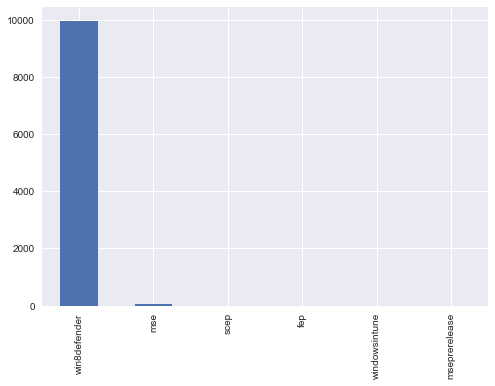

In [48]:
df_sample['ProductName'].value_counts().plot(kind='bar')

### Hand Select Columns to Drop

In [ ]:
# (df.groupby(['SmartScreen'])['HasDetections'].sum() / df.groupby(['SmartScreen']).HasDetections.count())['Block']

# def group_column(df, attribute, identifier, num_samples=1000, percentage=0.2):
#     for k in series.keys():
#         cond1 = df.groupby([attribute]).HasDetections.count() > num_samples
#         cond2 = (df.groupby(['SmartScreen']).HasDetections.sum() / df.groupby(['SmartScreen']).HasDetections.count())['Block']